In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
import matplotlib.pyplot as plt


# Data Wrangling + Cleansing

In [17]:
file_path = Path("crypto_data.csv")

crypto_df = pd.read_csv(file_path,index_col = 0)

In [18]:
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [25]:
crypto_clean = crypto_df[crypto_df.IsTrading == True]

In [26]:
crypto_clean2 = crypto_clean.drop(columns=['IsTrading'])

In [27]:
crypto_clean2.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [29]:
crypto_clean2.dropna(inplace=True)


crypto_clean2.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [30]:
crypto_clean3 = crypto_clean2[crypto_clean2.TotalCoinsMined > 0]

crypto_clean3.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.

In [38]:
CoinName = crypto_clean3.filter(['CoinName'], axis=1)

In [39]:
crypto_clean4 = crypto_clean3.drop(['CoinName'], axis=1)
labels = crypto_clean3['CoinName']

In [40]:
labels = crypto_clean3['CoinName']

# Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

In [41]:
data = pd.get_dummies(crypto_clean4, columns=['Algorithm', 'ProofType'])

data

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [43]:
scale = StandardScaler()

data_scaled = scale.fit_transform(data)



In [44]:
data_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction

In [120]:
n = 0.90


pca = PCA(n_components = n)



In [121]:
data_pca = pca.fit_transform(data_scaled)

data_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         7.87306563e-16, -1.84616729e-18, -4.15361072e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.17409449e-15,  5.25116470e-16, -3.80497340e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.75207903e-14, -2.36464424e-14,  2.84400186e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.93578889e-14, -8.67896697e-15, -3.66917605e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.78255127e-15, -2.03579310e-16, -4.38160754e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -4.70588149e-16, -9.07306180e-17, -2.78763670e-15]])

In [122]:
explained_variance_data = pca.explained_variance_ratio_


In [123]:
explained_variance_data

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [124]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

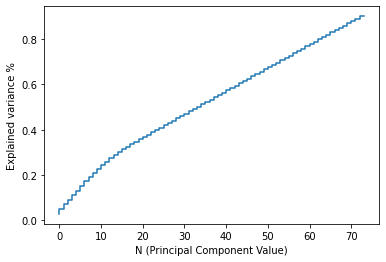

In [125]:
plot = np.cumsum(explained_variance_data)

plt.step(range(0,len(plot)), plot)

plt.ylabel('Explained variance %')

plt.xlabel('N (Principal Component Value)')

plt.show()

In [162]:
tsne = TSNE(learning_rate=50)


In [163]:
data_tsne = tsne.fit_transform(data_pca)



In [164]:
data_tsne.shape

(532, 2)

In [165]:
x = data_tsne[:,0]
y = data_tsne[:,1]

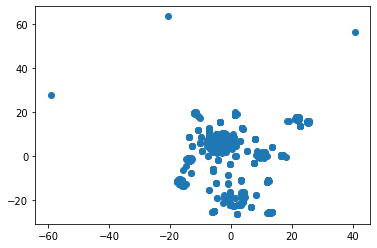

In [166]:
plt.scatter(x, y)
plt.show()

# Cluster Analysis with k-Means

In [188]:
inertia = []

k = list(range(1, 11))

for i in k:
    
    km = KMeans(n_clusters=i, random_state=50)
    
    km.fit(data_pca)
    
    inertia.append(km.inertia_)



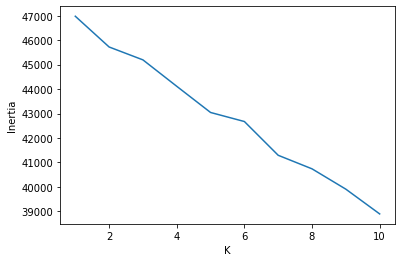

In [232]:
plt_data = {"k": k, "inertia": inertia}

plt_data1 = pd.DataFrame(plt_data)

plt.plot(plt_data1['k'], plt_data1['inertia'])


plt.xlabel('K')

plt.ylabel('Inertia')

plt.show()

In [193]:
plt_data1.head(11)

,k,inertia
0,1,46979.075160
1,2,45721.481085
2,3,45194.080224
3,4,44113.225863
4,5,43042.145624
5,6,42672.189485
6,7,41290.886133
7,8,40736.696584
8,9,39904.887223
9,10,38892.519657


# Model --> Fit --> Predict

In [194]:
model = KMeans(n_clusters=5, random_state=50)


In [195]:
model.fit(data_tsne)

KMeans(n_clusters=5, random_state=50)

In [231]:
predict = model.predict(data_tsne)

In [218]:
predict_df = pd.DataFrame(predict).reset_index(drop=True)

predict_df

,0
0,2
1,2
2,2
3,4
4,1
...,...
527,4
528,2
529,1
530,1


In [219]:
crypto_clean4['Class'] = model.labels_



In [230]:
crypto_clean4.head(50)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,2
404,Scrypt,PoW/PoS,1.055185e+09,532000000,2
1337,X13,PoW/PoS,2.927942e+10,314159265359,2
BTC,SHA-256,PoW,1.792718e+07,21000000,4
ETH,Ethash,PoW,1.076842e+08,0,1
LTC,Scrypt,PoW,6.303924e+07,84000000,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,1
ETC,Ethash,PoW,1.133597e+08,210000000,1
ZEC,Equihash,PoW,7.383056e+06,21000000,1


In [221]:
crypto_clean4['Class'].value_counts()

1    182
2    125
0     88
3     87
4     50
Name: Class, dtype: int64

# Recommendation

# Based on the analysis done, the cryptocurrencies can be clustered into five different groups...I would recommend additional analyses to identify attributes of each of the 5 cryptocurrency clusters created. 